In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [16]:
np.random.seed(42)

In [11]:
df=pd.read_csv('df_PCA.csv',delimiter=',')
df.head()

,customer_id,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
0,1b8f824d5e,0.136414,0.000248,0.591799,0.789285,0.054109,0.422382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5d272b9dcb,0.136332,0.000000,0.594984,0.801680,0.036851,0.205378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,f6d1b2ba63,0.214315,0.021475,0.301219,0.871834,0.354534,0.216267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,180c632ed8,0.141628,0.006605,0.597401,0.797470,0.174912,0.282334,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4eb37a6705,0.141919,0.006840,0.597255,0.787897,0.085252,0.446357,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
df.set_index('customer_id',inplace=True)

In [18]:
metric_features=df.columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30554 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PC0                           30554 non-null  float64
 1   PC1                           30554 non-null  float64
 2   PC2                           30554 non-null  float64
 3   PC3                           30554 non-null  float64
 4   PC4                           30554 non-null  float64
 5   PC5                           30554 non-null  float64
 6   customer_region_2440          30554 non-null  float64
 7   customer_region_2490          30554 non-null  float64
 8   customer_region_4140          30554 non-null  float64
 9   customer_region_4660          30554 non-null  float64
 10  customer_region_8370          30554 non-null  float64
 11  customer_region_8550          30554 non-null  float64
 12  customer_region_8670          30554 non-null  float

In [20]:
cluster_range = range(5, 16)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df, cluster_labels)
    avg_silhouette.append(silhouette_avg)


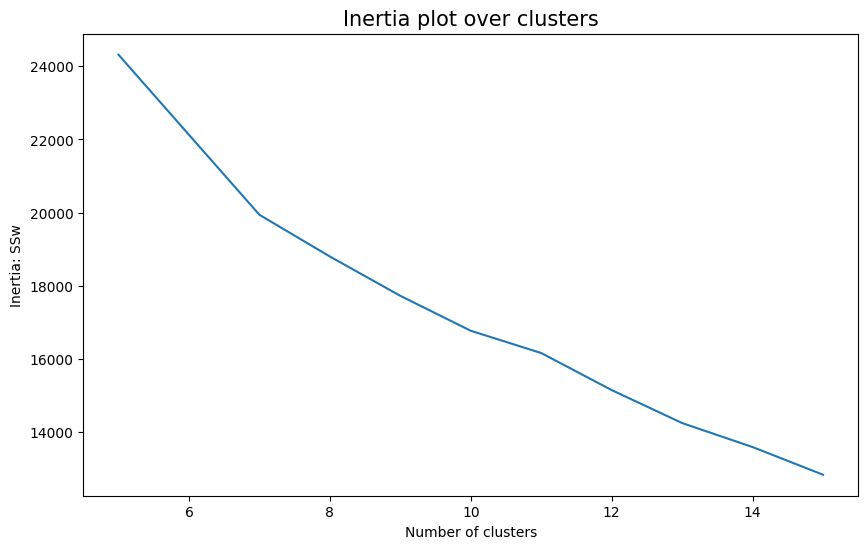

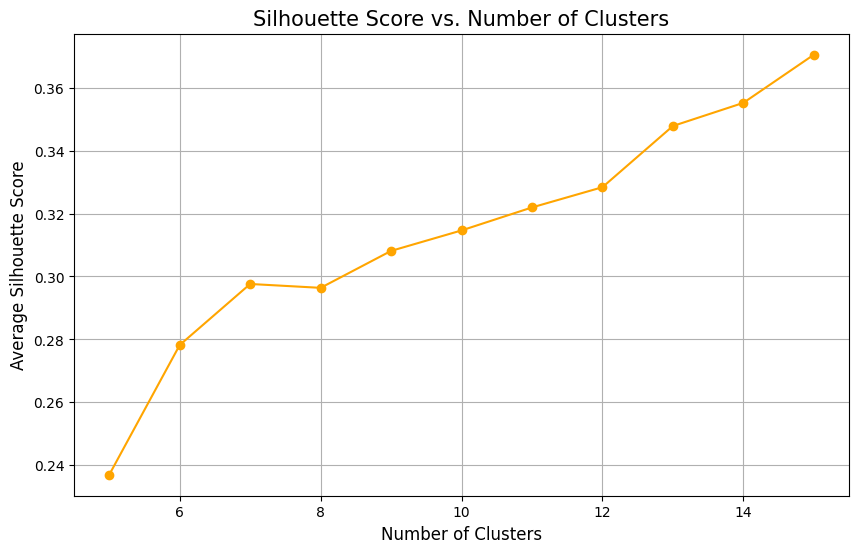

In [21]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()



7 clusters appear to balance most metrics (silhouette score, inertia, and Davies-Bouldin index)

In [22]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(df)


In [23]:
#tsne = TSNE(n_components=2, random_state=42)
#X_tsne = tsne.fit_transform(df)

# Step 4: Create a DataFrame for visualization
#df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
#df['Cluster'] = kmeans_labels  # Add KMeans cluster labels to DataFrame

# Step 5: Plot the t-SNE results, color-coded by KMeans cluster
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df, s=100, marker='o', legend='full')
#plt.title("t-SNE Visualization of KMeans Clustering")
#plt.show()

In [24]:
df_clean=pd.read_csv('df_Clean.csv',delimiter=',')

In [25]:
df_clean.set_index('customer_id',inplace=True)
df_clean_numeric = df_clean.select_dtypes(include=['number'])
df_concat = pd.concat((df_clean_numeric, pd.Series(kmeans_labels, name='labels', index=df_clean.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_23,Total_Spent,order_count,Diversity_Cuisine,costumer_time,Intensity_of_Activity,Customer_loyalty,product_intensity,Day_Week_Spread,hour_spread
labels,,,,,,,,,,,,,,,,,,,,,
0,27.440946,2.970081,6.160714,2.561560,26.700971,67.156642,7.790537,6.040287,0.000000,2.433440,...,0.014568,43.906286,4.954417,2.098747,40.455670,9.320090,0.750839,1.233144,0.846223,0.479386
1,27.541310,2.803981,4.779912,2.502661,30.690349,61.063643,4.223349,6.676617,1.692428,0.679269,...,0.027308,30.436154,3.792409,1.651545,30.373293,7.540440,0.864377,1.257244,0.623544,0.321632
2,27.541894,3.792927,7.017187,4.344406,24.119650,65.543712,2.661127,3.494318,2.475460,0.308182,...,0.055693,28.665153,5.384069,1.851589,41.424062,9.204753,0.821474,1.290540,0.930110,0.551221
3,27.248919,2.488473,4.249280,2.474424,33.650937,57.536383,2.297392,4.877406,1.959262,0.317424,...,0.036023,23.460032,3.257205,1.477049,23.885447,5.947085,0.890152,1.346528,0.541993,0.287082
4,27.439675,2.028468,3.234523,1.702666,37.695888,53.979666,3.007732,6.175784,1.766118,0.319435,...,0.017623,23.297614,2.527338,1.367638,16.283778,4.267876,0.921396,1.288332,0.405956,0.173506
5,27.478603,3.136827,5.568268,2.825036,26.981659,64.639884,4.685115,10.912486,2.543476,0.759042,...,0.036681,38.285220,4.321689,1.824989,37.658224,9.440298,0.839875,1.298195,0.732654,0.393664
6,27.504838,3.111835,5.294566,1.978042,29.255117,65.254373,5.816491,24.332008,5.203329,0.000000,...,0.038147,56.228437,3.827689,1.844955,35.999256,9.422541,0.886652,1.394352,0.593484,0.291060


In [26]:
df_concat.to_csv('df_kmeans.csv')

In [27]:
cluster_means = df_concat.groupby('labels').mean().T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3,4,5,6
customer_age,27.44,27.54,27.54,27.25,27.44,27.48,27.50
vendor_count,2.97,2.80,3.79,2.49,2.03,3.14,3.11
product_count,6.16,4.78,7.02,4.25,3.23,5.57,5.29
is_chain,2.56,2.50,4.34,2.47,1.70,2.83,1.98
first_order,26.70,30.69,24.12,33.65,37.70,26.98,29.26
last_order,67.16,61.06,65.54,57.54,53.98,64.64,65.25
CUI_American,7.79,4.22,2.66,2.30,3.01,4.69,5.82
CUI_Asian,6.04,6.68,3.49,4.88,6.18,10.91,24.33
CUI_Beverages,0.00,1.69,2.48,1.96,1.77,2.54,5.20
CUI_Cafe,2.43,0.68,0.31,0.32,0.32,0.76,0.00


In [28]:
cuisines = [col for col in df_clean.columns if col.startswith("CUI_")]
df_clean['cluster'] = kmeans_labels
cluster_summary = df_clean.groupby('cluster')[cuisines].mean()


In [29]:
cluster_cuisine_spending = cluster_summary[cuisines]

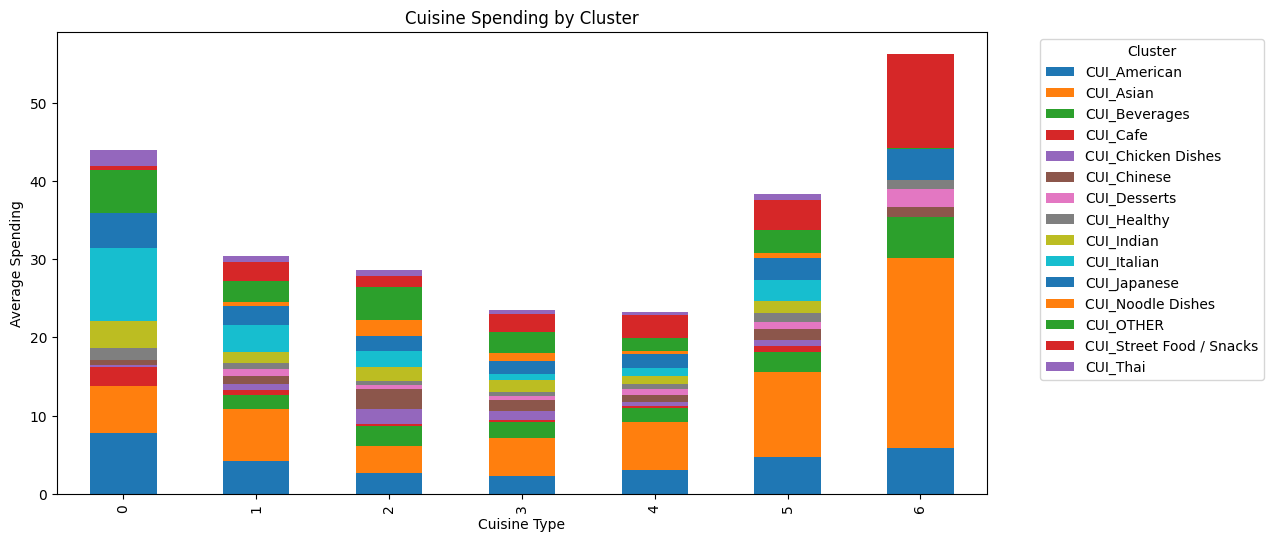

In [30]:
cluster_cuisine_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
df_clean.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Spent', 'order_count',
       'Diversity_Cuisine', 'costumer_time', 'Intensity_of_Activity',
       'Customer_loyalty', 'product_intensity', 'Day_Week_Spread',
       'hour_spread', 'cluster'],
      dtype='object')

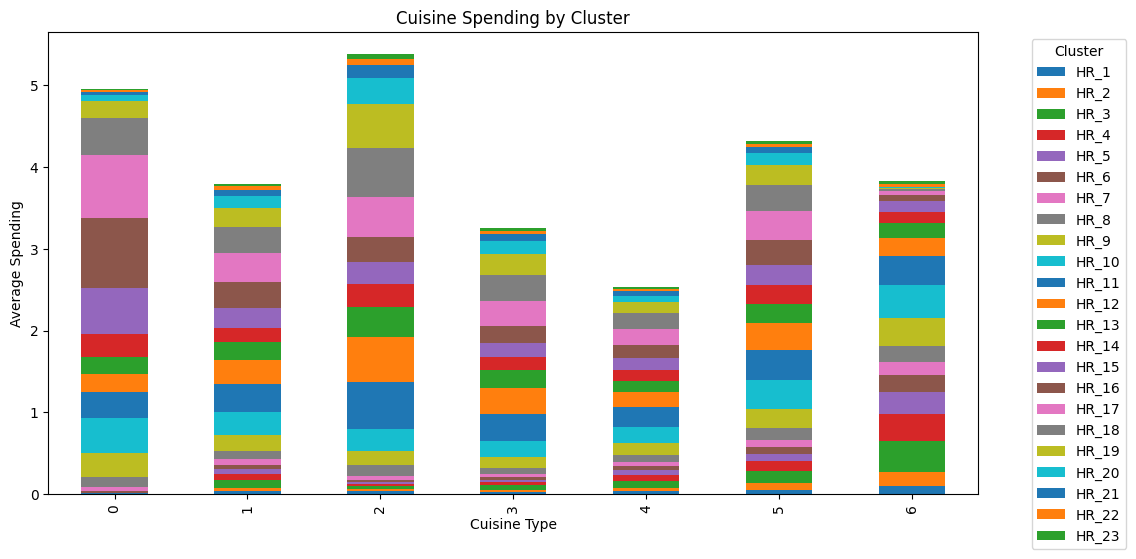

In [32]:
hours=[col for col in df_clean.columns if col.startswith("HR_")]
hours_summary = df_clean.groupby('cluster')[hours].mean()
cluster_hour_spending = hours_summary[hours]
cluster_hour_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

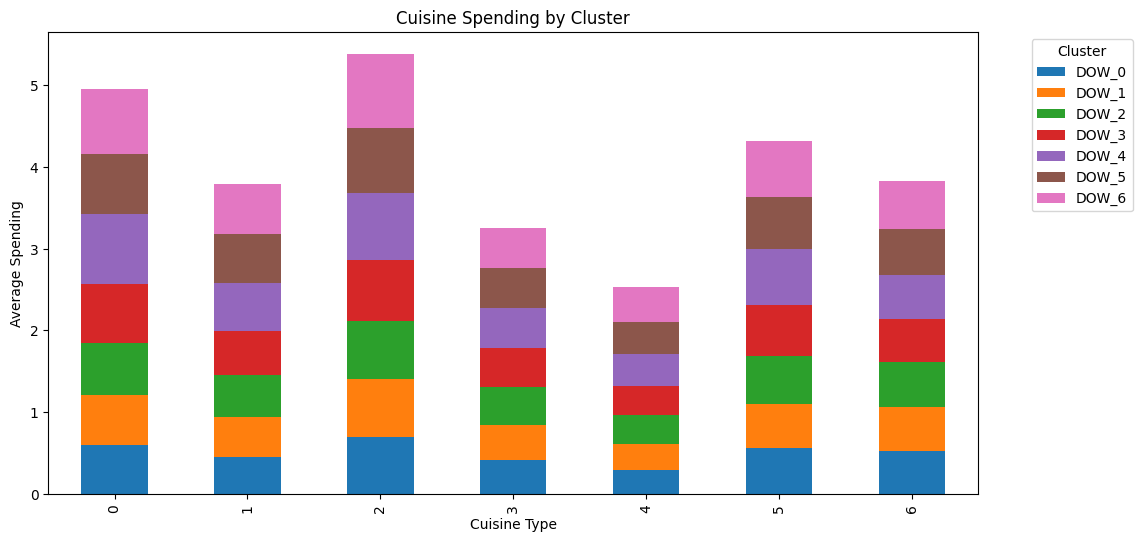

In [33]:
days_week=[col for col in df_clean.columns if col.startswith("DOW_")]
week_summary = df_clean.groupby('cluster')[days_week].mean()
cluster_week_spending = week_summary[days_week]
cluster_week_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()